 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_returns_path = Path("Resources/whale_returns.csv")

In [3]:
whale_returns_df = pd.read_csv(whale_returns_path, index_col = "Date", infer_datetime_format=True, parse_dates=True)

In [4]:
# Reading whale returns
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [5]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_returns_path = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_path, index_col = "Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [8]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_path = Path("Resources/sp_tsx_history.csv")
sp_tsx_df = pd.read_csv(sp_tsx_path, index_col = "Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_df

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [11]:
# Check Data Types
print(sp_tsx_df.dtypes)

Close    object
dtype: object


In [12]:
# Fix Data Types
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "", regex=False)
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",", "", regex=False)
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype("float")
sp_tsx_df

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [13]:
print(sp_tsx_df.dtypes)

Close    float64
dtype: object


In [14]:
# Calculate Daily Returns
daily_returns = sp_tsx_df.pct_change()
daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [15]:
# Drop nulls
daily_returns.dropna(inplace=True)
daily_returns.isnull().sum()

Close    0
dtype: int64

In [16]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns.columns = ["SP TSX Daily Returns"]
daily_returns

,SP TSX Daily Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_returns = pd.concat([whale_returns_df, algo_returns_df, daily_returns], axis = "columns", join="inner")
combined_returns.columns = ["SOROS","PAULSON","TIGER","BERKSHIRE","Algo1","Algo2","S&P TSX"]
combined_returns


,SOROS,PAULSON,TIGER,BERKSHIRE,Algo1,Algo2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

## Performance Anlysis

#### Calculate and Plot the daily returns.

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

<AxesSubplot:xlabel='Date'>

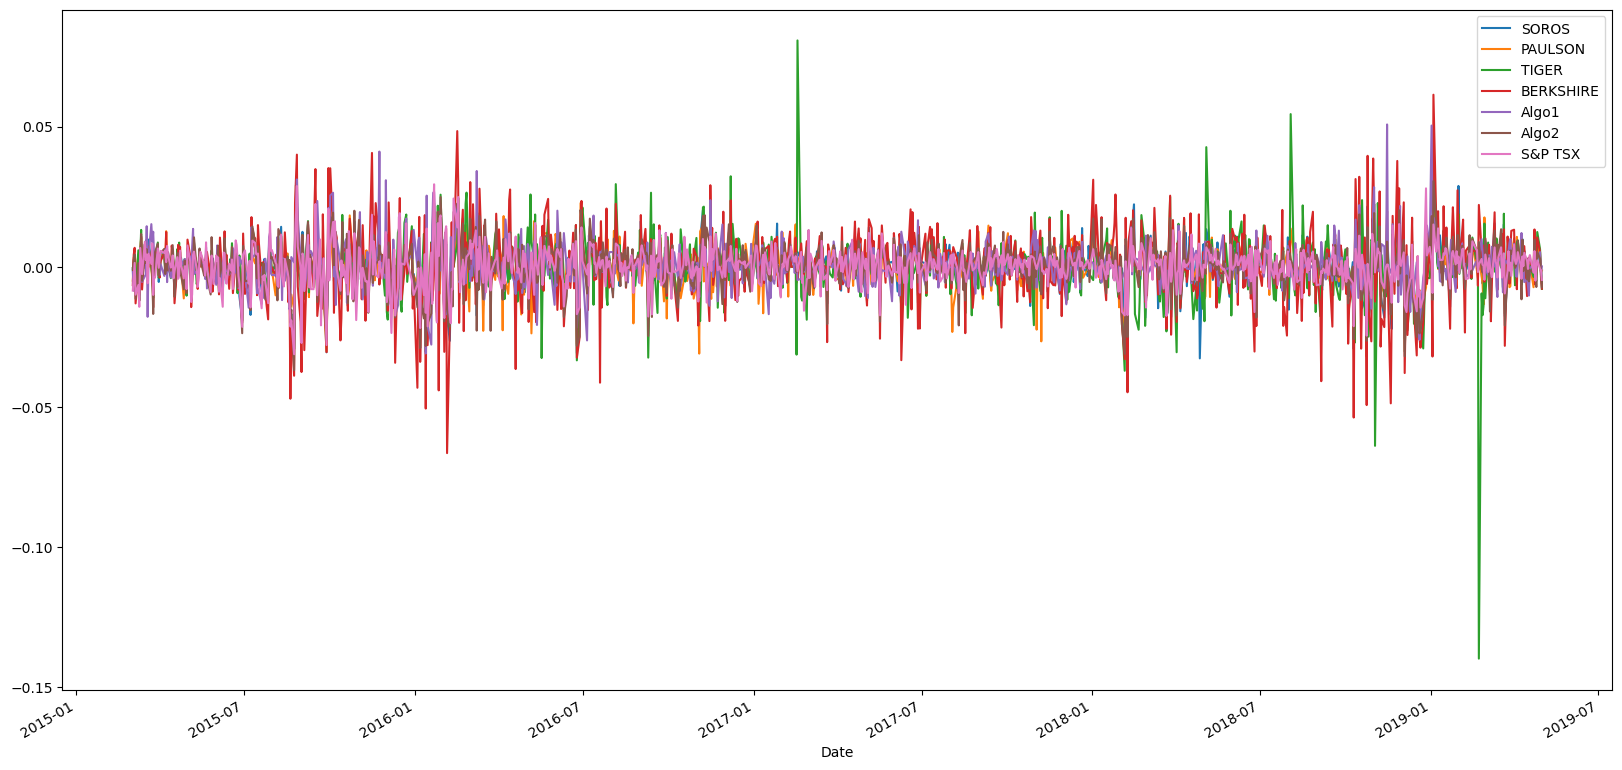

In [18]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod() - 1
cumulative_returns.head()

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo1,Algo2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.011872
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.010544
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.020411
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.026832


<AxesSubplot:title={'center':'Cumulative Returns of whale portfolio, algo portfolio & SP TSX index'}, xlabel='Date'>

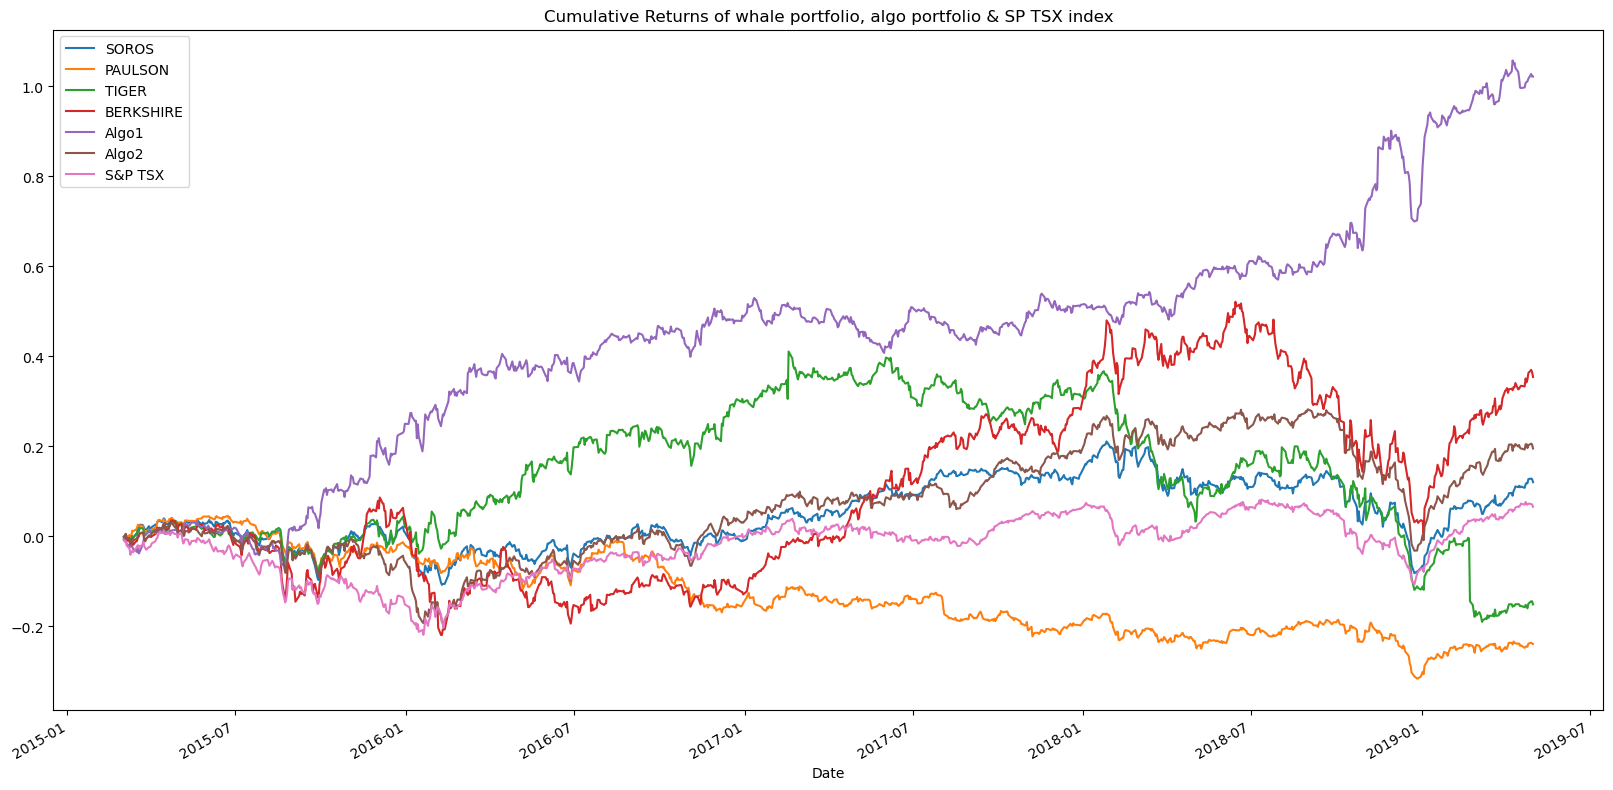

In [20]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns of whale portfolio, algo portfolio & SP TSX index")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

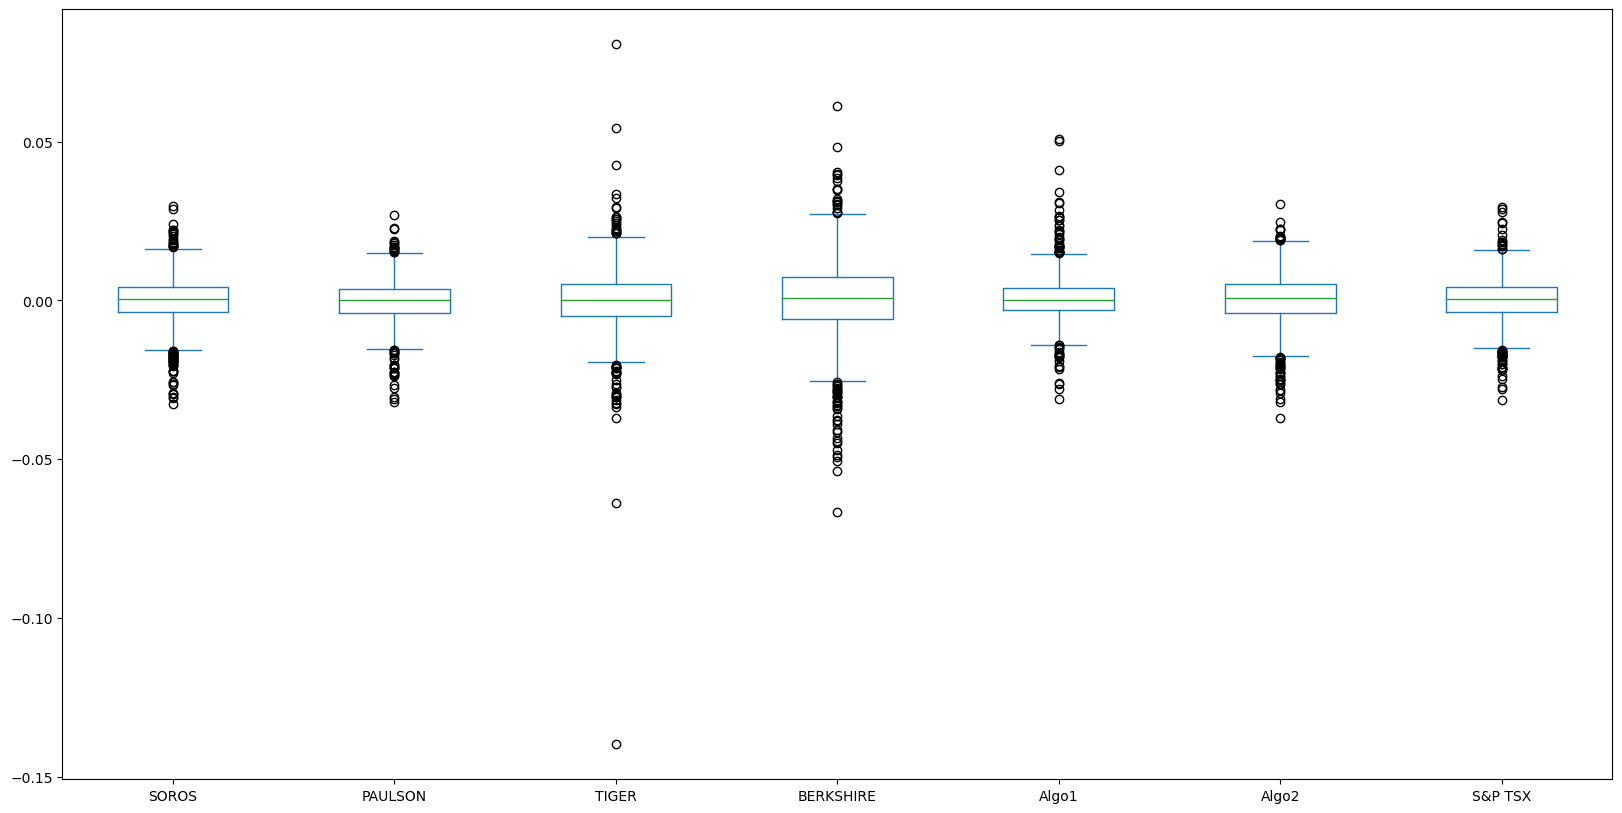

In [21]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios
combined_returns_std = combined_returns.std()
combined_returns_std

SOROS        0.007828
PAULSON      0.006982
TIGER        0.010883
BERKSHIRE    0.012826
Algo1        0.007589
Algo2        0.008326
S&P TSX      0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [23]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_daily_std = combined_returns["S&P TSX"].std()
sp_tsx_daily_std

0.007034167748577725

In [24]:
# Determine which portfolios are riskier than the S&P TSX 60
combined_returns_std = combined_returns_std.sort_values(ascending=False)
combined_returns_std

BERKSHIRE    0.012826
TIGER        0.010883
Algo2        0.008326
SOROS        0.007828
Algo1        0.007589
S&P TSX      0.007034
PAULSON      0.006982
dtype: float64

In [25]:
print(f"Those portfolios are riskier than the S&P TSX 60 : Berkshire, Tiger, Algo2, Soros, Algo1")

Those portfolios are riskier than the S&P TSX 60 : Berkshire, Tiger, Algo2, Soros, Algo1


### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_returns.std() * np.sqrt(252)
annualized_std

SOROS        0.124259
PAULSON      0.110841
TIGER        0.172759
BERKSHIRE    0.203599
Algo1        0.120470
Algo2        0.132177
S&P TSX      0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

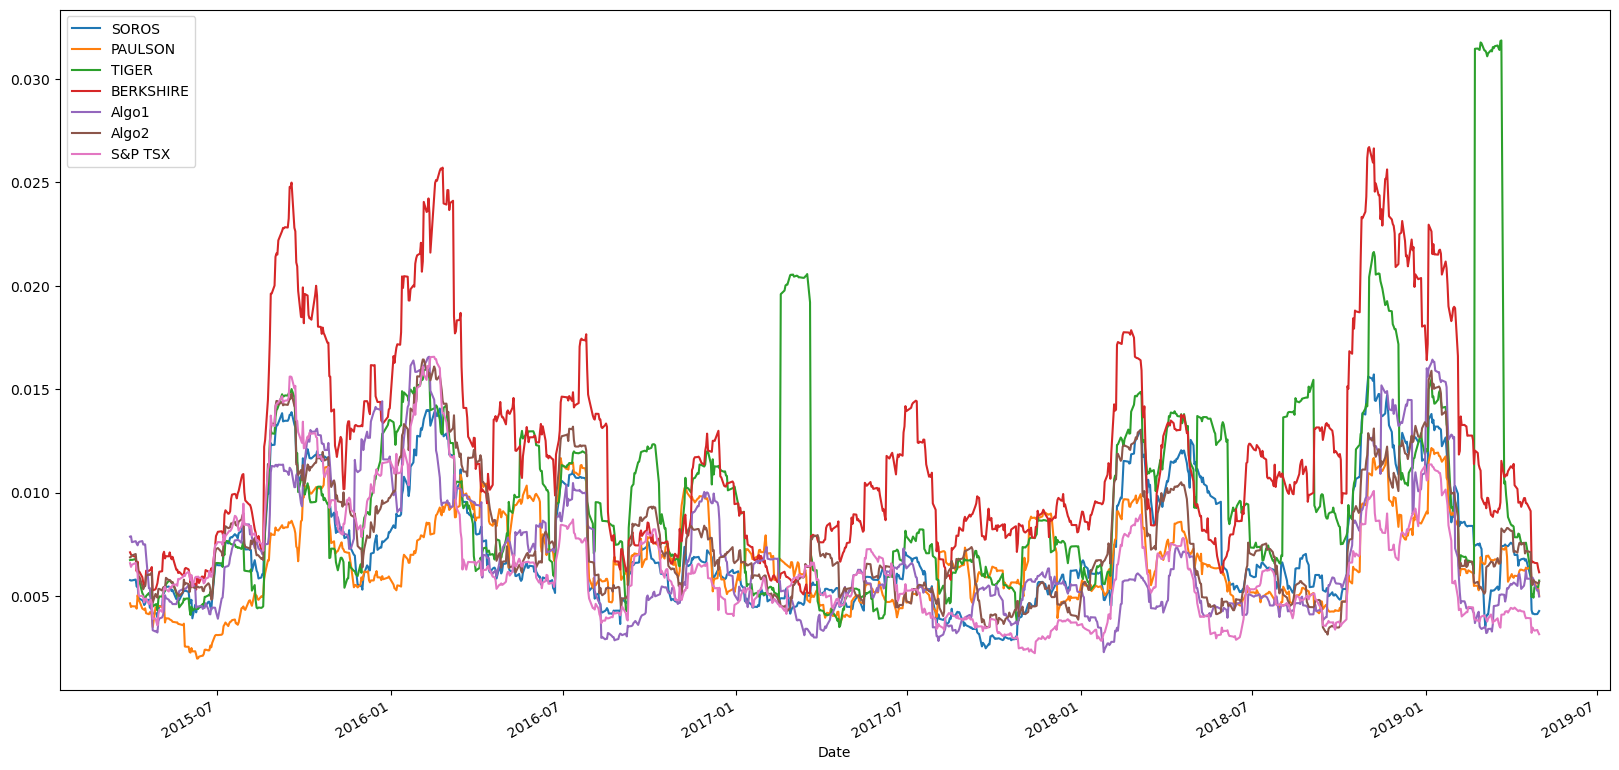

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_returns_std21=combined_returns.rolling(window=21).std()

# Plot the rolling standard deviation
combined_returns_std21.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

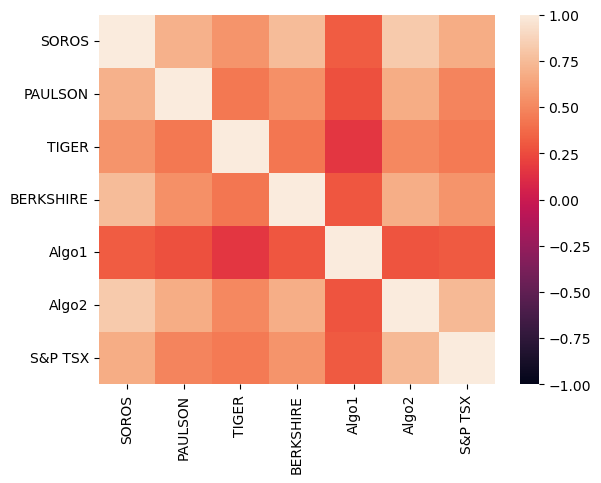

In [28]:
# Calculate the correlation
correlation = combined_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of SOROS'}, xlabel='Date'>

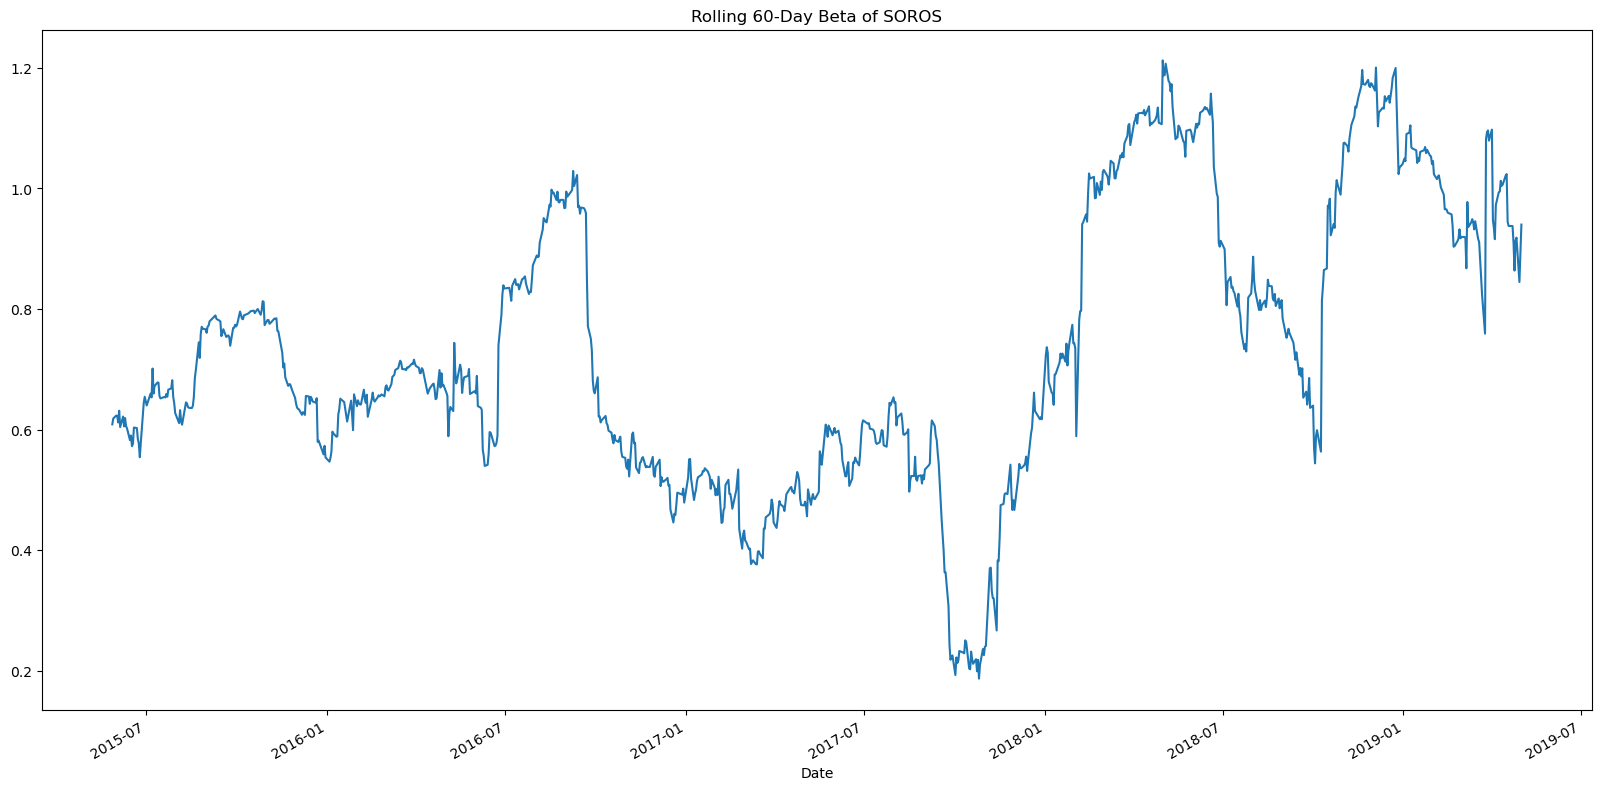

In [29]:
# Calculate covariance of a single portfolio
rolling_covariance_soros = combined_returns['SOROS'].rolling(window=60).cov(combined_returns['S&P TSX'])

# Calculate variance of S&P TSX
rolling_variance = combined_returns['S&P TSX'].rolling(window=60).var()

# Computing beta
rolling_beta_soros = rolling_covariance_soros/ rolling_variance

# Plot beta trend
rolling_beta_soros.plot(figsize=(20, 10), title='Rolling 60-Day Beta of SOROS')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

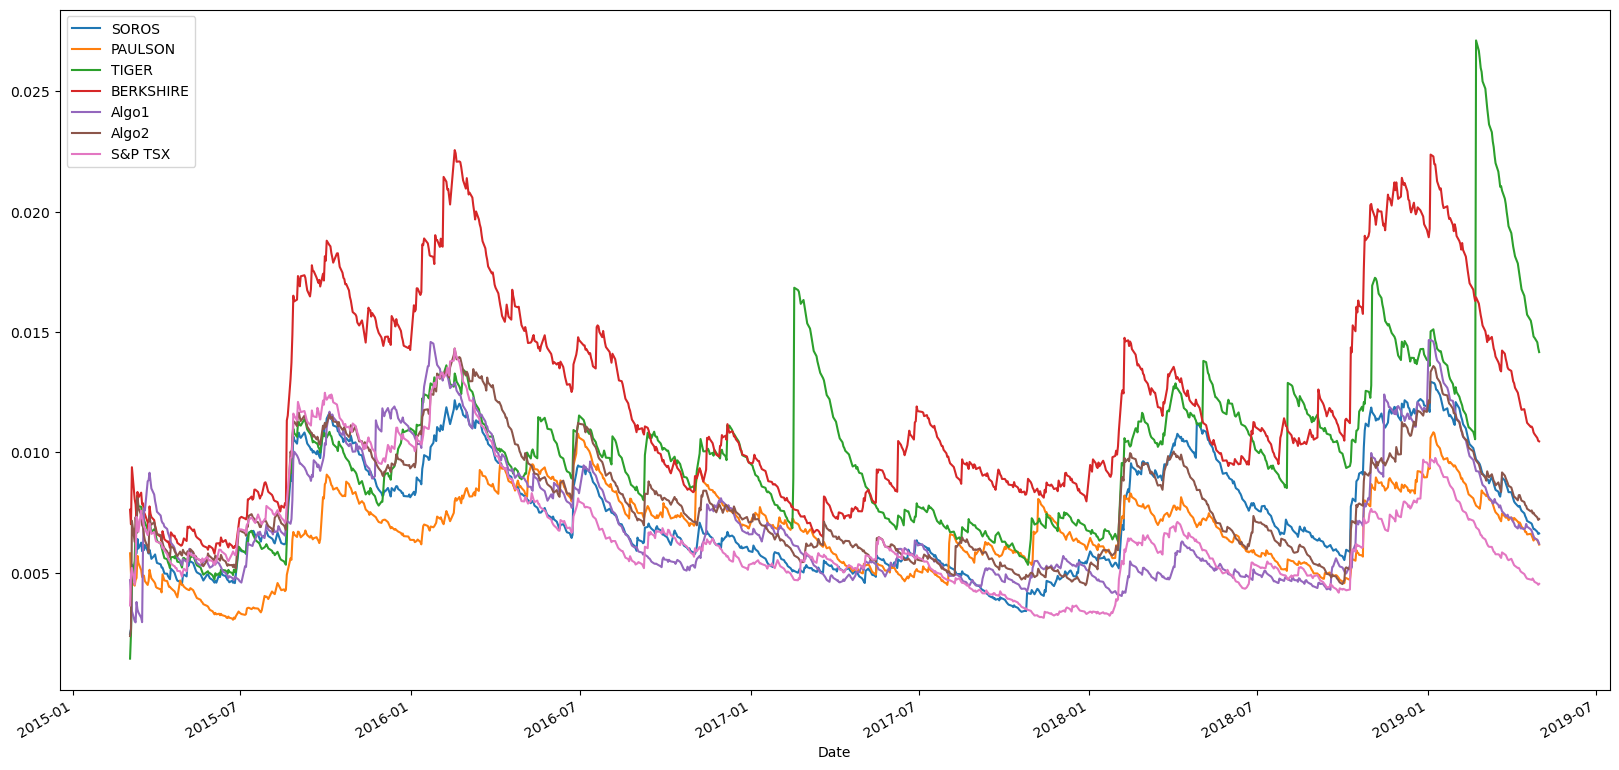

In [30]:
# Use `ewm` to calculate the rolling window
ewma_std = combined_returns.ewm(halflife=21).std()
ewma_std.plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

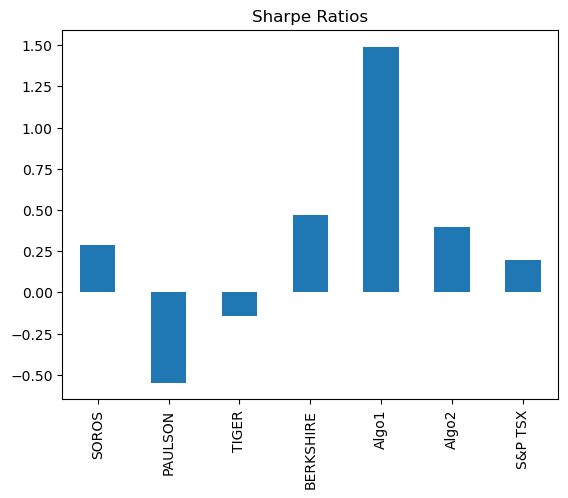

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algorithmic strategies have higher Sharpe ratios than the S&P/TSX 60 index, indicating that algo portfolios can potentially generate higher returns than the index at the same level of risk. Furthermore, algo portfolios outperform whale portfolios because the Sharpe ratios of whale portfolios are unstable and could even be negative.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [33]:
# Reading data from 1st stock
stock_1_path = Path("Resources/l_historical.csv")
stock_1_df = pd.read_csv(stock_1_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
stock_1_df.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [34]:
# Reading data from 2nd stock
stock_2_path = Path("Resources/otex_historical.csv")
stock_2_df = pd.read_csv(stock_2_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
stock_2_df.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [35]:
# Reading data from 3rd stock
stock_3_path = Path("Resources/shop_historical.csv")
stock_3_df = pd.read_csv(stock_3_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
stock_3_df.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [36]:
# Combine all stocks in a single DataFrame
portfolio_df=pd.concat([stock_1_df, stock_2_df, stock_3_df], axis = "columns", join = "inner")
portfolio_df.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51


In [37]:
portfolio_df.columns = ["L","L Close","OTEX", " OTEX Close", "SHOP", "SHOP Close"]
portfolio_df.head()

,L,L Close,OTEX,OTEX Close,SHOP,SHOP Close
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51


In [38]:
# Reorganize portfolio data by having a column per symbol
portfolio_df.drop(columns = ["L", "OTEX", "SHOP"], inplace = True)
portfolio_df

,L Close,OTEX Close,SHOP Close
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [39]:
# Calculate daily returns
daily_returns = portfolio_df.pct_change()
daily_returns.columns = ["L returns", "OTEX returns", "SHOP returns"]
# Drop NAs
daily_returns = daily_returns.dropna()

# Display sample data
daily_returns

,L returns,OTEX returns,SHOP returns
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254
...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503
2019-12-23,-0.003240,-0.013463,-0.003118
2019-12-24,-0.000148,-0.007773,0.026915


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [40]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
                ...   
2019-12-20    0.007495
2019-12-23   -0.006607
2019-12-24    0.006331
2019-12-27    0.007995
2019-12-30   -0.015737
Length: 500, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [41]:
# Join your returns DataFrame to the original returns DataFrame
returns_compare = pd.concat([combined_returns, portfolio_returns], axis="columns", join ="inner")
returns_compare=returns_compare.rename(columns={ 0 : "Portfolio returns"})
returns_compare

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo1,Algo2,S&P TSX,Portfolio returns
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


In [42]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
returns_compare.isnull().sum()

SOROS                0
PAULSON              0
TIGER                0
BERKSHIRE            0
Algo1                0
Algo2                0
S&P TSX              0
Portfolio returns    0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [43]:
# Calculate the annualized `std`
myportfolio_annualized_std = portfolio_returns.std()* np.sqrt(252)
myportfolio_annualized_std 

0.21679368071345856

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

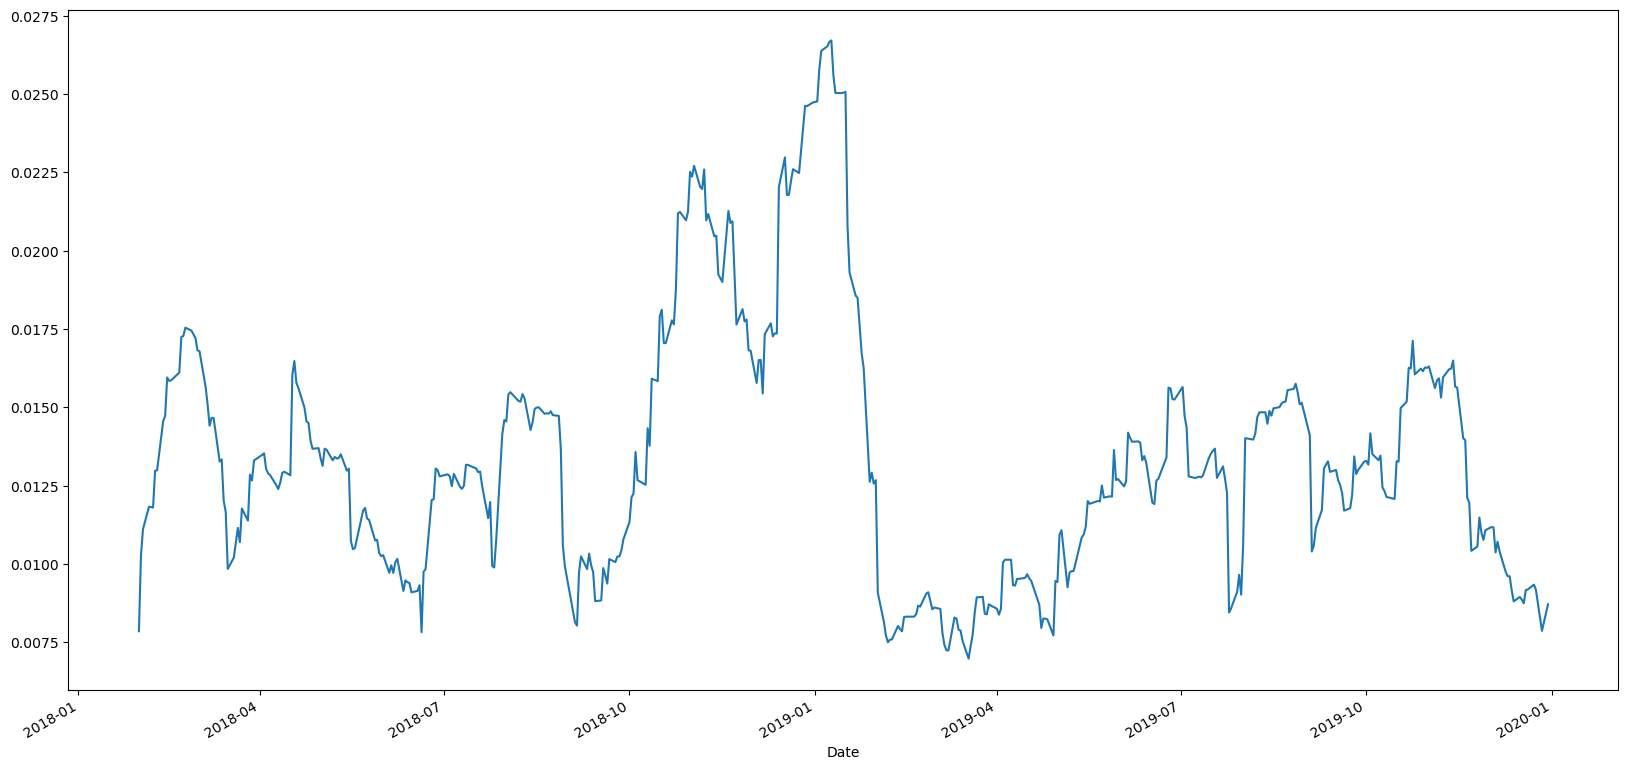

In [44]:
# Calculate rolling standard deviation
myportfolio_rolling_std = portfolio_returns.rolling(window=21).std()
# Plot rolling standard deviation
myportfolio_rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

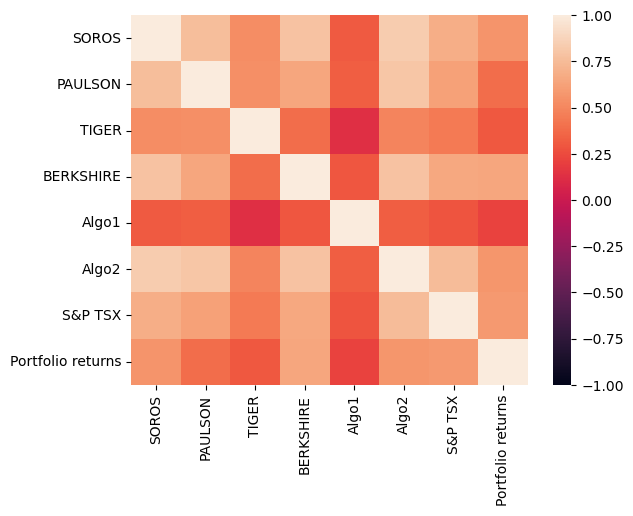

In [45]:
# Calculate and plot the correlation
correlation = returns_compare.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio'}, xlabel='Date'>

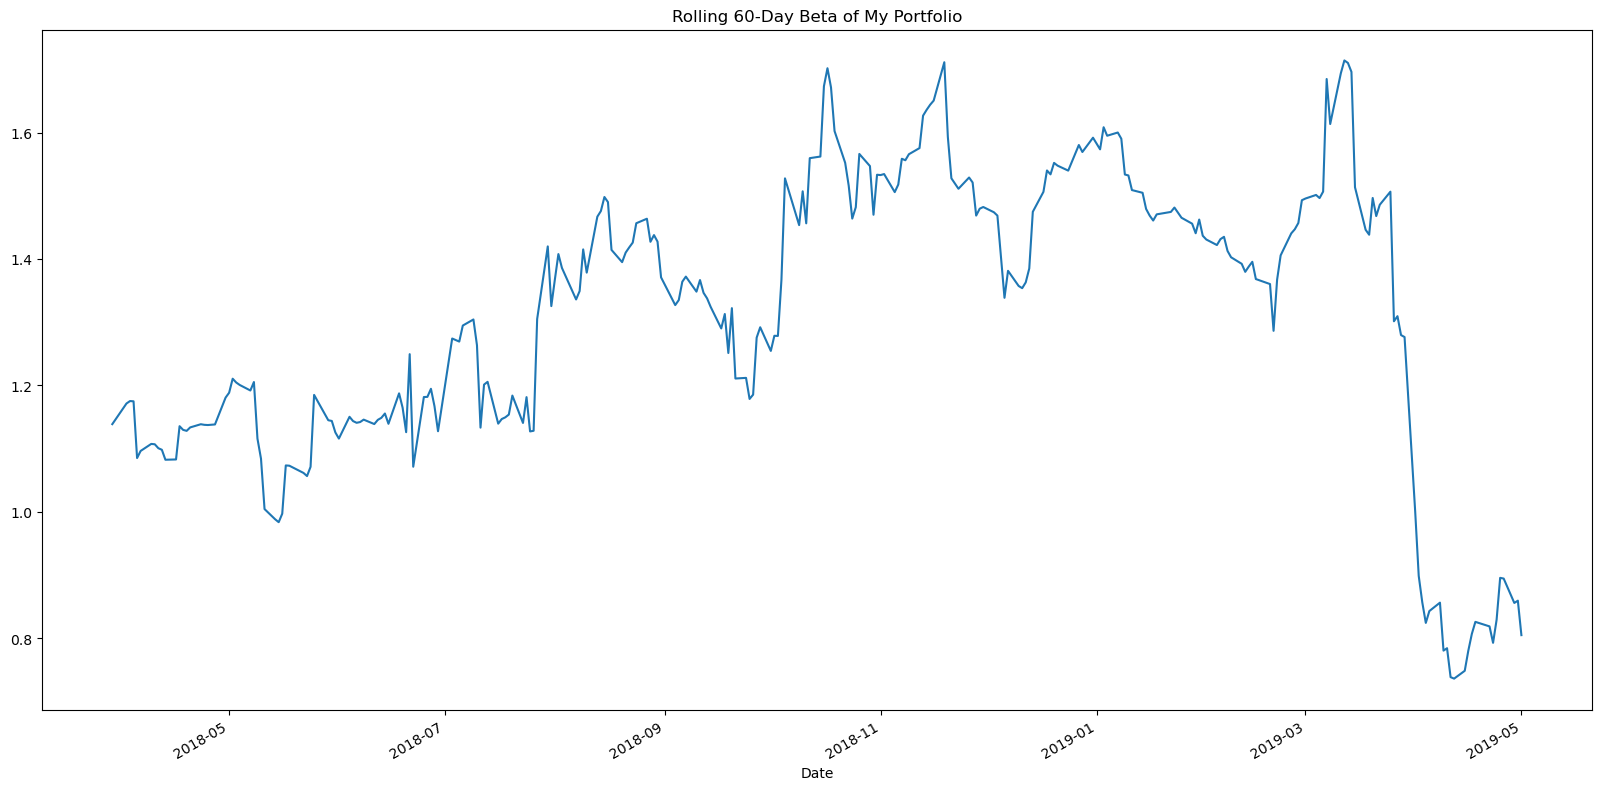

In [46]:
# Calculate and plot Beta
rolling_covariance_myportfolio= returns_compare['Portfolio returns'].rolling(window=60).cov(returns_compare['S&P TSX'])

rolling_beta_myportfolio = rolling_covariance_myportfolio/ rolling_variance

# Plot beta trend
rolling_beta_myportfolio.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (returns_compare.mean() * 252) / (returns_compare.std() * np.sqrt(252))


<AxesSubplot:title={'center':'Sharpe Ratios'}>

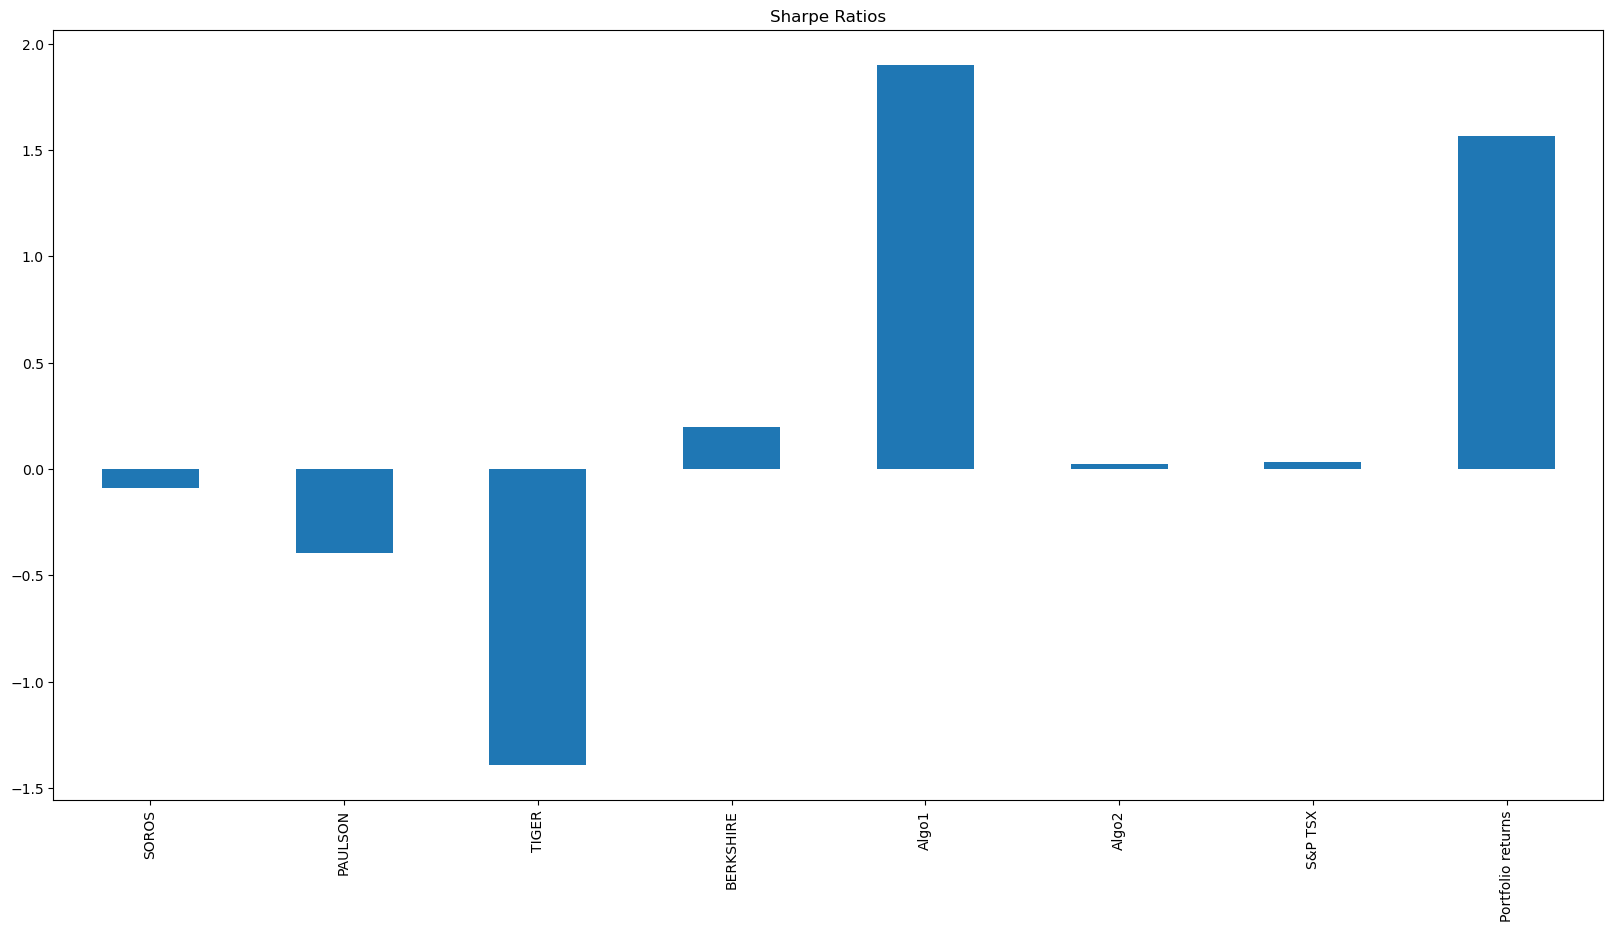

In [48]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize=(20,10))

### How does your portfolio do?

After analyzing the data from March 3rd, 2018 to May 1st, 2019, I found that my portfolio outperformed the S&P TSX index, the whale portfolios, and the Algo 2 portfolio in terms of the Sharpe ratio. However, the Algo 1 portfolio performed better than mine during the same period.